Found 810 images belonging to 90 classes.
Found 180 images belonging to 90 classes.
Epoch 1/10
26/26 [==============================] - 253s 10s/step - loss: 4.9988 - accuracy: 0.0099 - val_loss: 4.4979 - val_accuracy: 0.0278
Epoch 2/10
26/26 [==============================] - 114s 4s/step - loss: 4.4698 - accuracy: 0.0519 - val_loss: 4.4489 - val_accuracy: 0.0444
Epoch 3/10
26/26 [==============================] - 117s 4s/step - loss: 4.0542 - accuracy: 0.1259 - val_loss: 4.4764 - val_accuracy: 0.0889
Epoch 4/10
26/26 [==============================] - 124s 5s/step - loss: 2.0329 - accuracy: 0.5531 - val_loss: 5.6629 - val_accuracy: 0.1056
Epoch 5/10
26/26 [==============================] - 129s 5s/step - loss: 0.5354 - accuracy: 0.8852 - val_loss: 10.3717 - val_accuracy: 0.1333
Epoch 6/10
26/26 [==============================] - 123s 5s/step - loss: 0.2637 - accuracy: 0.9580 - val_loss: 9.8723 - val_accuracy: 0.1167
Epoch 7/10
26/26 [==============================] - 117s 4s/step - l

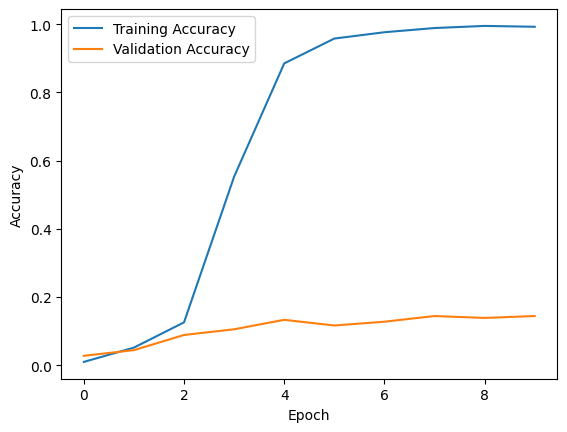

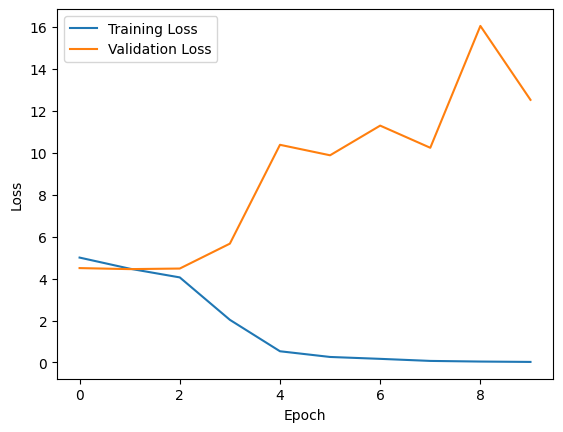

6/6 [==============================] - 7s 976ms/step - loss: 12.5136 - accuracy: 0.1444
Validation Accuracy: 14.44%
6/6 [==============================] - 8s 1s/step


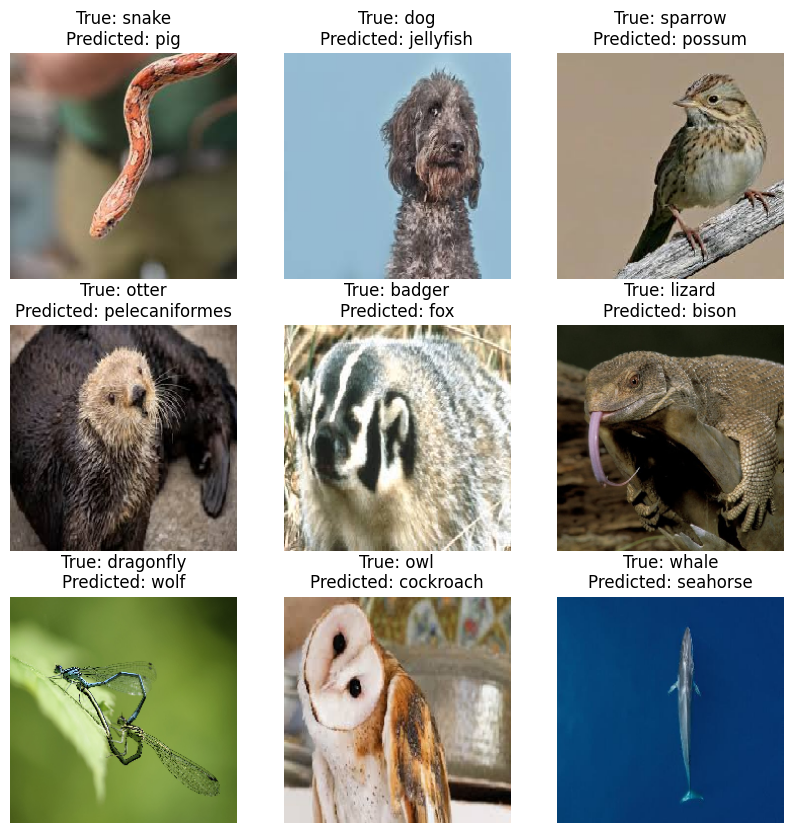

In [6]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set the path to your animal dataset
dataset_path = '/content/drive/MyDrive/animals'

# Define parameters
batch_size = 32
image_size = (224, 224)
epochs = 10

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
eval_result = model.evaluate(validation_generator)
print(f"Validation Accuracy: {eval_result[1] * 100:.2f}%")

# Make predictions on some validation data
predictions = model.predict(validation_generator)
predicted_classes = tf.argmax(predictions, axis=1)

# Display a few images with their predicted and true labels
class_names = list(train_generator.class_indices.keys())
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(validation_generator[0][0][i])
    plt.title(f"True: {class_names[validation_generator[0][1][i].argmax()]}\nPredicted: {class_names[predicted_classes[i]]}")
    plt.axis('off')
plt.show()


6/6 [==============================] - 10s 2s/step


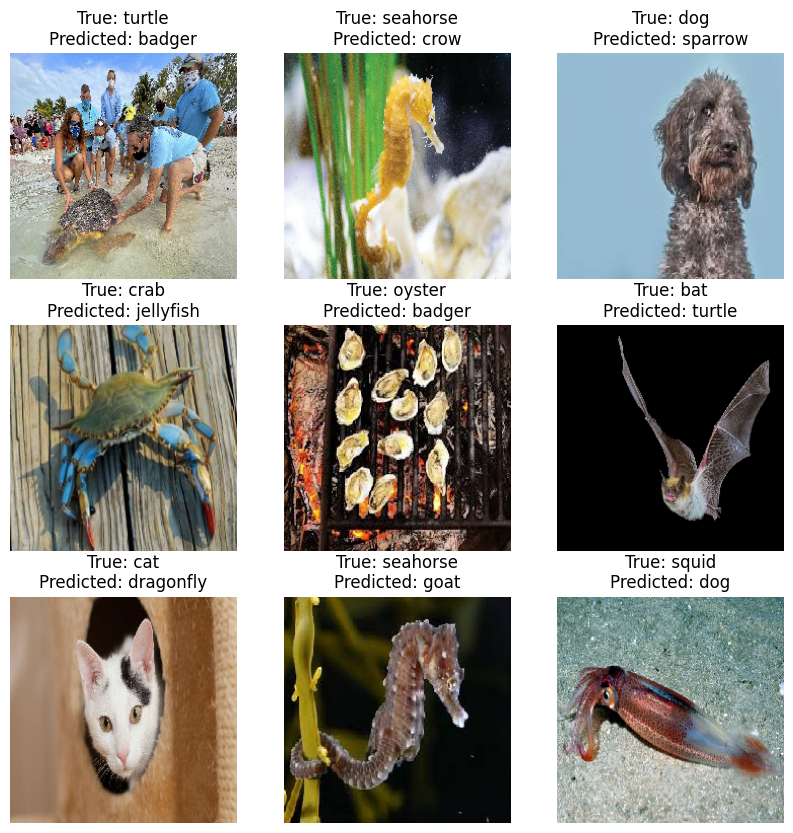

In [7]:
# Make predictions on some validation data
predictions = model.predict(validation_generator)
predicted_classes = tf.argmax(predictions, axis=1)

# Display a few images with their predicted and true labels
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(validation_generator[0][0][i])
    true_label = class_names[validation_generator[0][1][i].argmax()]
    predicted_label = class_names[predicted_classes[i]]
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')
plt.show()


In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [10]:
model.save("animal_classifier.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
